# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
raw_df = pd.read_csv('Data/unicef.csv')


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    29 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          39 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [14]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [15]:
first_row = raw_df.iloc[0]

# Kiểm tra và chuyển đổi cột 'reactions' thành từ điển
if pd.notna(first_row['reactions']) and isinstance(first_row['reactions'], str):
    reactions = dict(eval(first_row['reactions']))
else:
    reactions = {}  # Tạo một từ điển rỗng nếu không phải chuỗi hợp lệ

# Thêm thông tin về 'shares' và 'comments'
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']


In [16]:
reactions

{'thích': 235,
 'yêu thích': 13,
 'thương thương': 40,
 'buồn': 100,
 'shares': 17,
 'comments': 34}

## Reactions analysis

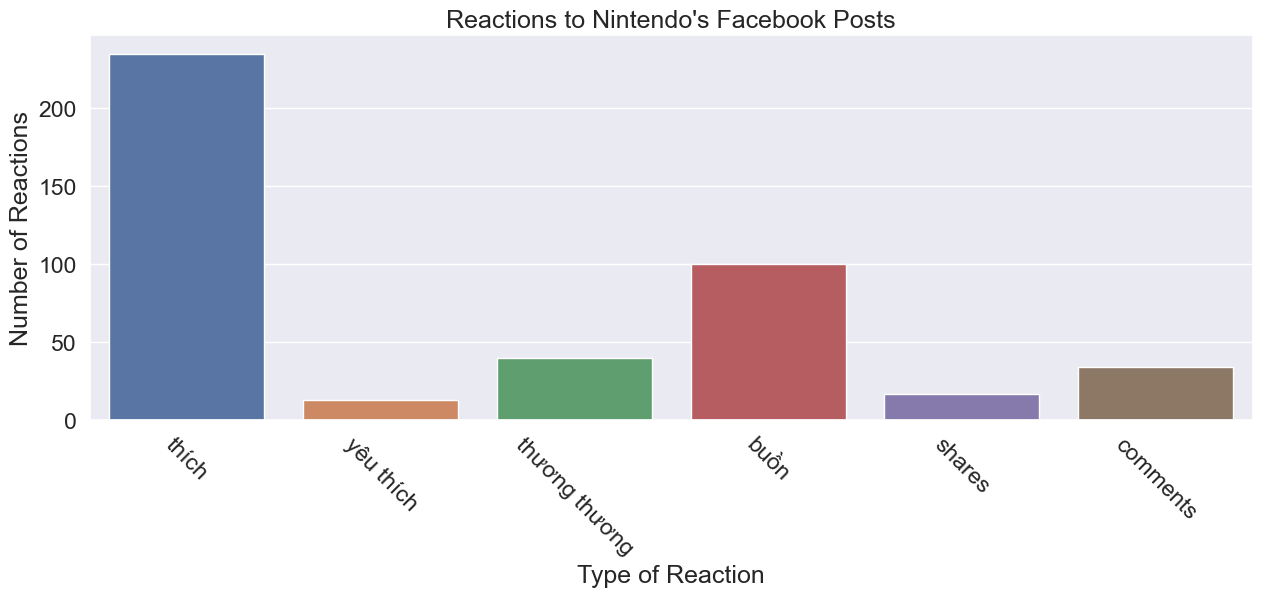

In [18]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Nintendo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [19]:
df_text = raw_df[['post_id','reactions']]


df_text

,post_id,reactions
0,762758365888751,"{'thích': 235, 'yêu thích': 13, 'thương thương..."
1,762643625900225,"{'thích': 149, 'yêu thích': 28, 'thương thương..."
2,762866202544634,"{'thích': 275, 'yêu thích': 13, 'haha': 1, 'th..."
3,762748455889742,"{'thích': 201, 'yêu thích': 10, 'thương thương..."
4,762650685899519,"{'thích': 237, 'yêu thích': 6, 'haha': 2, 'wow..."
...,...,...
95,742540631243858,NaN
96,741831924648062,NaN
97,741892367975351,NaN
98,741827034648551,NaN


In [20]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,762758365888751,11-year-old Milat sits in the rubble of his ho...
1,762643625900225,Seeing Luul suffering from severe malnutrition...
2,762866202544634,The scenes of carnage coming out of Jabaliya c...
3,762748455889742,"Hostilities have forced over 30,000 children t..."
4,762650685899519,“Isolated from the world where nobody knows ou...
...,...,...
95,742540631243858,Every child deserves a safe space to play and ...
96,741831924648062,"More than 100,000 people have been impacted by..."
97,741892367975351,"In any emergency, children are always among th..."
98,741827034648551,"More than 11,600 children crossed the Central ..."


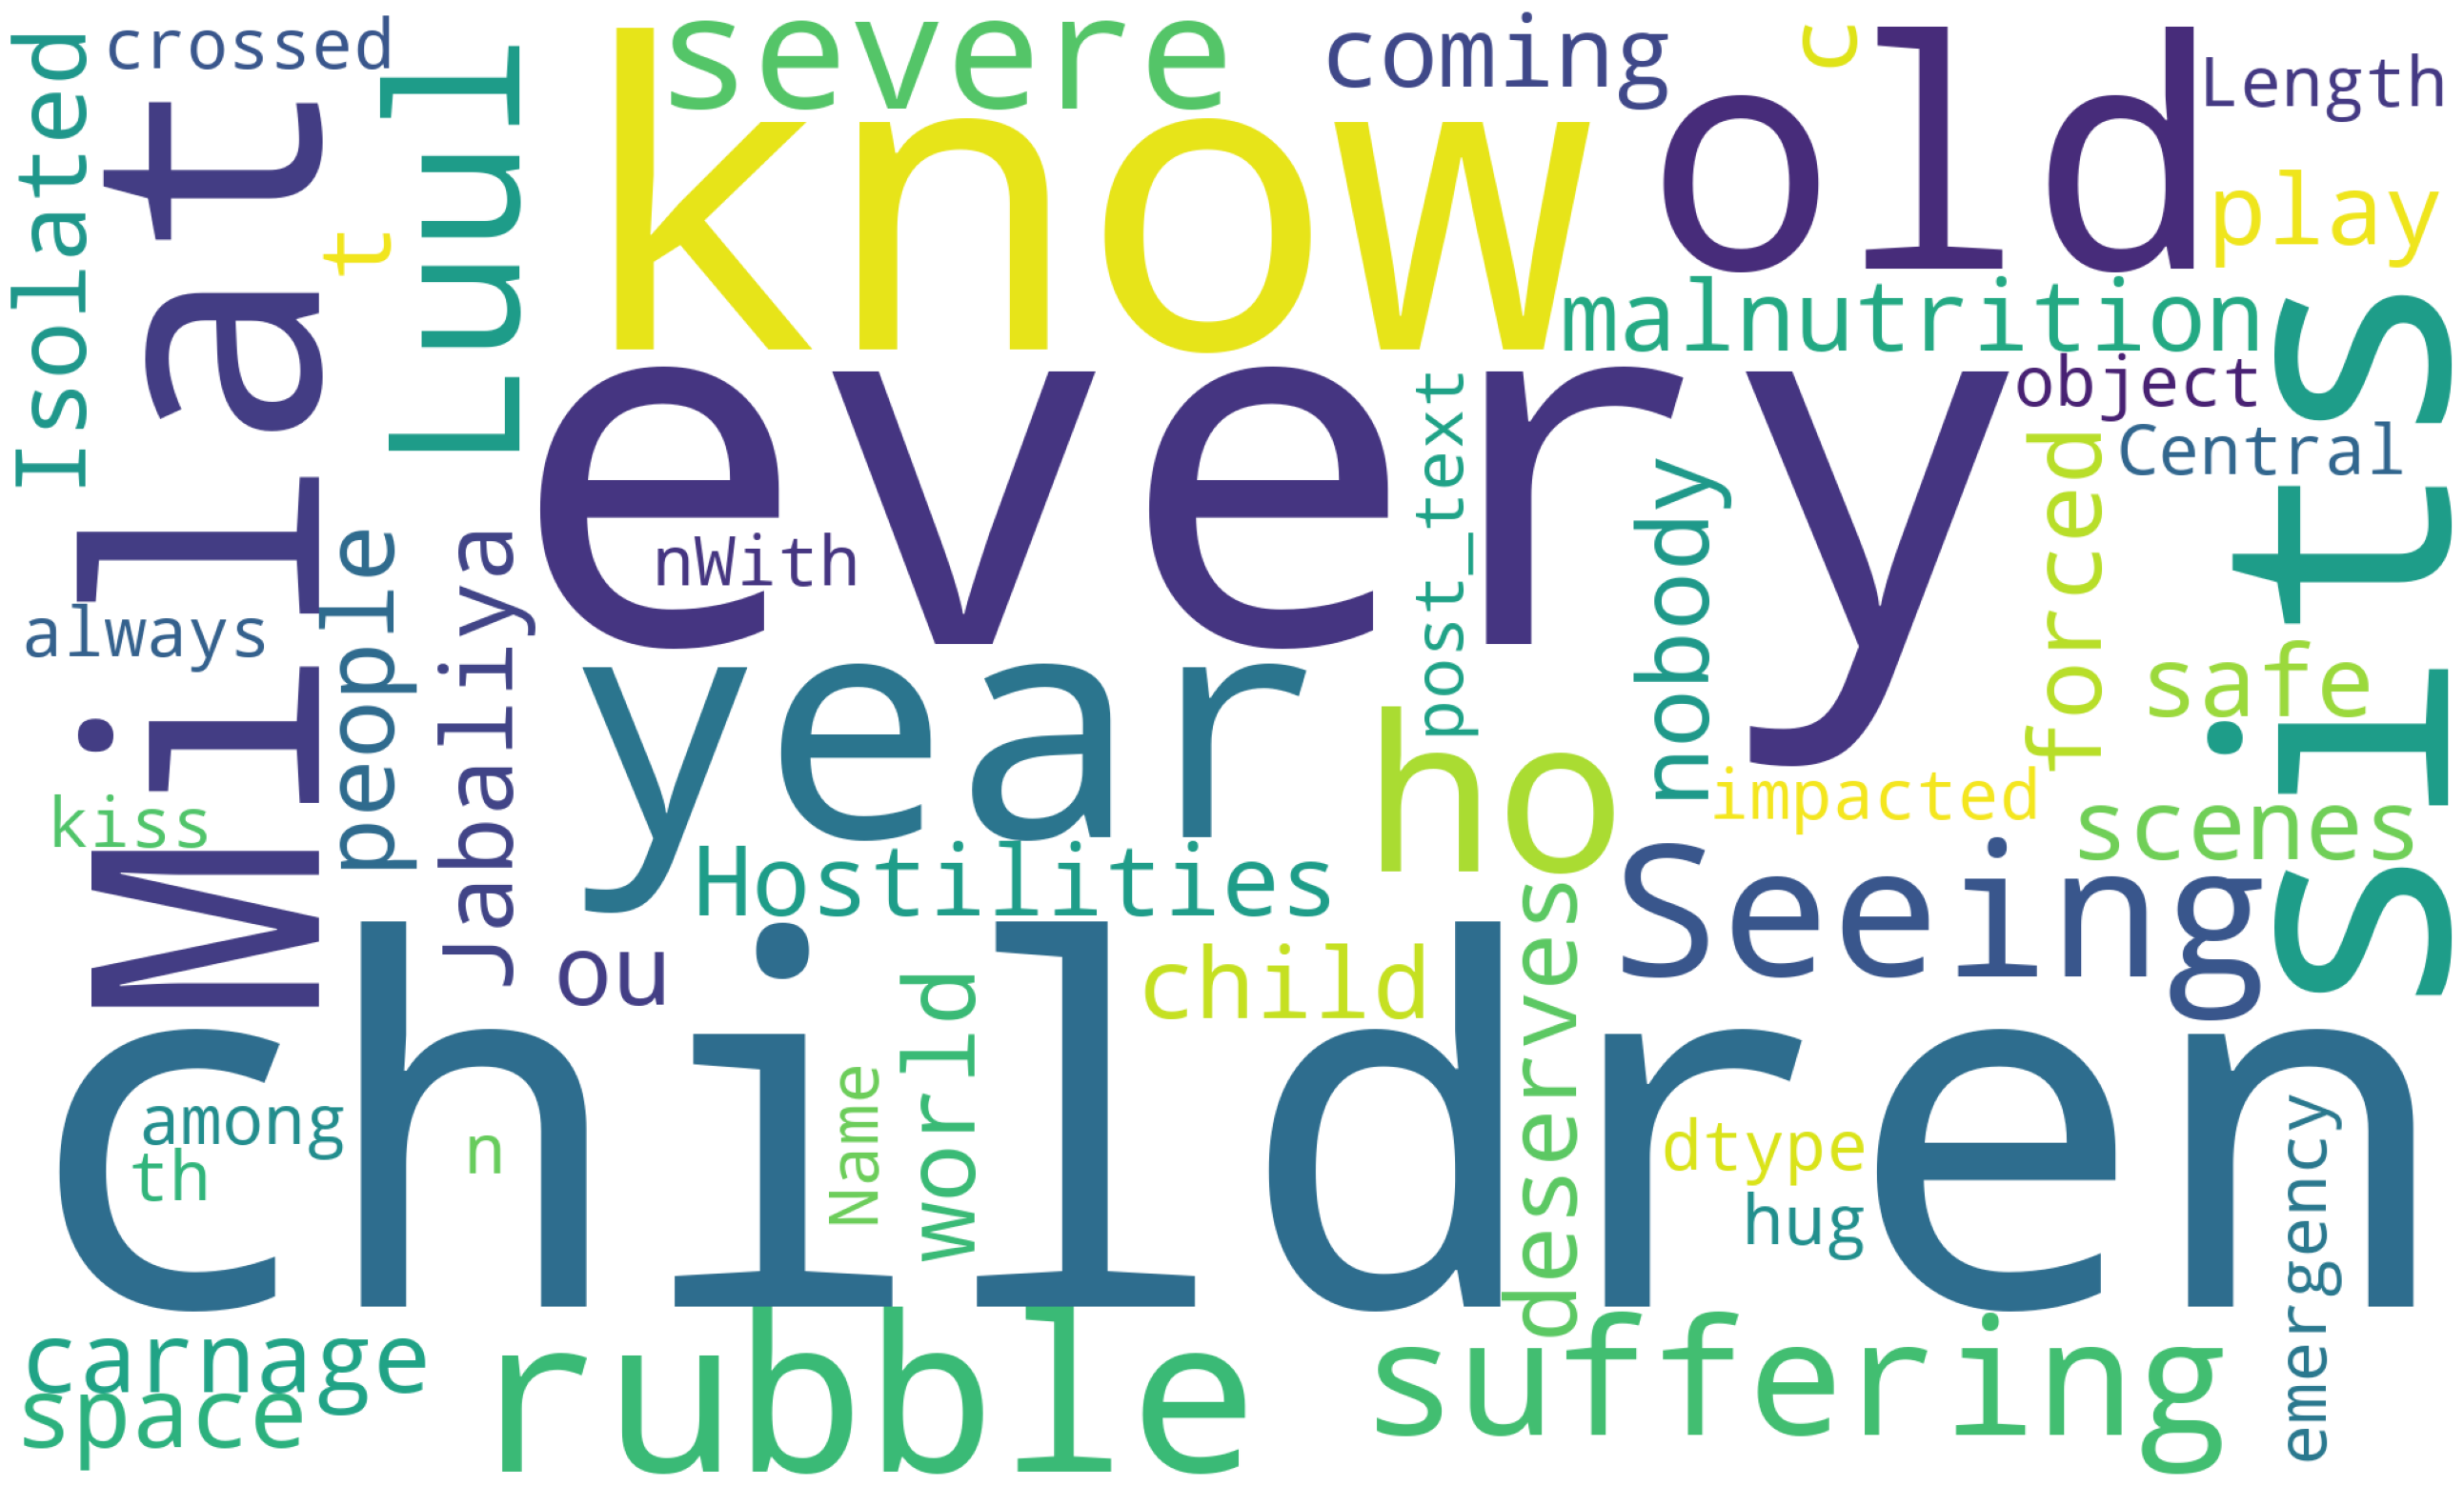

In [21]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()